In [ ]:
# https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import zipfile as zipf
import requests
import io
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore') 

In [2]:
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import LinearSVR
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

In [3]:
df = pd.read_csv('Clean_Dataset.csv', sep=',', na_values='\xa0' )
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


**Changing duration to mins** 

The duration column gives the number of hours it takes for the flight to reach the destination city, but this value in the dataset is given at two decimal places. It is more intutive to understand this value if we convert it to minutes. For eg: 130 minutes is more intutive to comprehend than 2.17 hours. Hence, we are coverting the duration column into mins.

In [5]:
df['dur_mins'] = (df['duration']*60).round().astype(int)

In [6]:
# Cleaning the unnecessary variables:

df=df.drop(['Unnamed: 0','flight','duration'],  axis=1)

In [7]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,dur_mins
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,130
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,140
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,130
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,135
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,140
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265,605
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105,625
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099,830
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585,600


**Encoding catagorical columns to numerical**

In [8]:
# Encoding Categorical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           300153 non-null  int32
 1   source_city       300153 non-null  int32
 2   departure_time    300153 non-null  int32
 3   stops             300153 non-null  int32
 4   arrival_time      300153 non-null  int32
 5   destination_city  300153 non-null  int32
 6   class             300153 non-null  int32
 7   days_left         300153 non-null  int64
 8   price             300153 non-null  int64
 9   dur_mins          300153 non-null  int32
dtypes: int32(8), int64(2)
memory usage: 13.7 MB


In [10]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,dur_mins
0,4,2,2,2,5,5,1,1,5953,130
1,4,2,1,2,4,5,1,1,5953,140
2,0,2,1,2,1,5,1,1,5956,130
3,5,2,4,2,0,5,1,1,5955,135
4,5,2,4,2,4,5,1,1,5955,140
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,49,69265,605
300149,5,1,0,0,5,3,0,49,77105,625
300150,5,1,1,0,5,3,0,49,79099,830
300151,5,1,1,0,2,3,0,49,81585,600


In [11]:
num_var = ['airline', 'source_city', 'departure_time', 'stops','arrival_time' , 'destination_city', 'class']
cat_var = ['days_left','dur_mins']
y = df['price']

In [12]:
X = df[cat_var + num_var]
X

,days_left,dur_mins,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,1,130,4,2,2,2,5,5,1
1,1,140,4,2,1,2,4,5,1
2,1,130,0,2,1,2,1,5,1
3,1,135,5,2,4,2,0,5,1
4,1,140,5,2,4,2,4,5,1
...,...,...,...,...,...,...,...,...,...
300148,49,605,5,1,4,0,2,3,0
300149,49,625,5,1,0,0,5,3,0
300150,49,830,5,1,1,0,5,3,0
300151,49,600,5,1,1,0,2,3,0


In [13]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
#XX=X.to_numpy()
#yy=y.to_numpy()

#print(type(yy))
#print(type(XX))
#print(XX.shape)
#print(yy.shape)

In [14]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (240122, 9)
X_test.shape: (60031, 9)
y_train.shape: (240122,)
y_test.shape: (60031,)


In [15]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 


pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, cat_var),
                                   ("numerical", pipeline_numerical, num_var),])

In [16]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (240122, 530)
X_test_transformed.shape: (60031, 530)

X_train_transformed: <class 'scipy.sparse.csr.csr_matrix'>
X_test_transformed: <class 'scipy.sparse.csr.csr_matrix'>


In [17]:
#X_train_transformed.reshape(-1,1)
#X_test_transformed.reshape(-1,1)

print('X_train_transformed:', X_train_transformed.shape)
print('X_test_transformed:', X_test_transformed.shape)
print()
print('X_train_transformed:', type(X_train_transformed.shape))
print('X_test_transformed:', type(X_test_transformed.shape))

X_train_transformed: (240122, 530)
X_test_transformed: (60031, 530)

X_train_transformed: <class 'tuple'>
X_test_transformed: <class 'tuple'>


In [18]:
print('y_train:', type(y_train))
print('y_test:', type(y_test))
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

y_train: <class 'pandas.core.series.Series'>
y_test: <class 'pandas.core.series.Series'>

y_train: (240122,)
y_test: (60031,)


In [19]:
y_test= y_test.to_numpy()
y_train= y_train.to_numpy()

In [20]:
print('y_train:', type(y_train))
print('y_test:', type(y_test))
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

y_train: <class 'numpy.ndarray'>
y_test: <class 'numpy.ndarray'>

y_train: (240122,)
y_test: (60031,)


In [21]:
#y_train=np.reshape(y_train,(-1,1))
#y_train

In [ ]:
#y_test=np.reshape(y_test,(-1,1))
#y_test

**Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [23]:
y_pred =lin_reg.predict(X_test_transformed)
y_pred

array([48348.71765126, 10614.00332972,  8676.06913745, ...,
        5712.372232  ,  6397.05113436,  9803.80323405])

In [24]:
print('y_test:', type(y_test))
print('y_pred:', type(y_pred))

y_test: <class 'numpy.ndarray'>
y_pred: <class 'numpy.ndarray'>


In [25]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [48348.71765126 10614.00332972  8676.06913745 53266.29804075
  5608.70147125]
Actual 1-5: [44652  7488  4792 54608  4298]


In [26]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean_Squared_Error(MSE):  43443491.609
Mean_Absolute_Error(MEA): 4419.435
R2_Score: 0.915
RMSE: 6591.168
Root_Mean_Squared_Log_Error(RMSLE): 8.793


In [27]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [28]:
Results_LinearRegression = pd.DataFrame([['Linear_Reg', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_LinearRegression

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Linear_Reg,4.344349e+07,4419.435,0.915,6591.168,8.793


In [29]:
# Cross-validation on DF

cv_scores = cross_val_score(lin_reg, X, np.ravel(y), cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  6.909 % std:  15.866 %


In [30]:
# Cross-validation on DF

scores = cross_val_score(lin_reg, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([ 4034.35472858,  4059.22159257,  3903.6735943 ,  9758.24123308,
       11776.08641447])

In [31]:
# Cross-validation on DF

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [ 4034.35472858  4059.22159257  3903.6735943   9758.24123308
 11776.08641447]
Mean: 6706.315512601208
Standard deviation: 3376.924931822836


In [32]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  91.562 % std:  0.0 %


In [33]:
# Cross-validation On Traing set:

scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([6595.56678967, 6585.64240087, 6605.09620276, 6627.41249072,
       6567.26227816])

In [34]:
# Cross-validation On Traing set:

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [6595.56678967 6585.64240087 6605.09620276 6627.41249072 6567.26227816]
Mean: 6596.196032437403
Standard deviation: 20.013083329374666


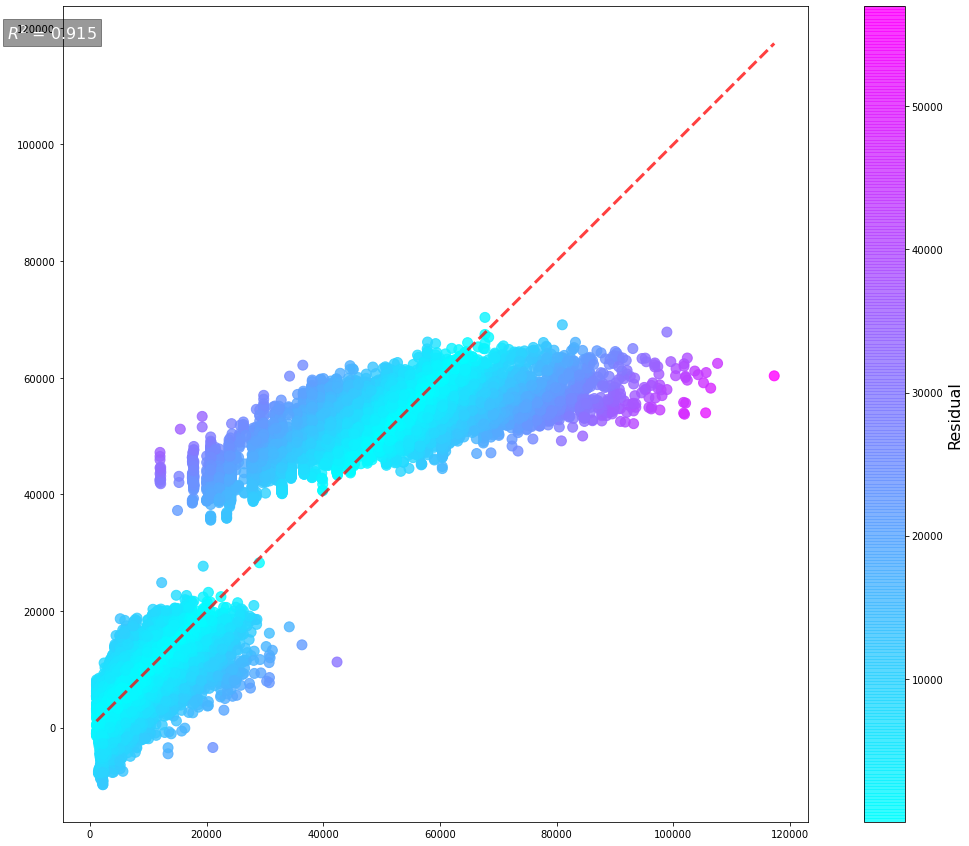

In [35]:
# visualizing the predictions
def plot_regression(y_true, y_pred, title="", axis_label=""):
  y_residual = np.abs(y_true-y_pred)
  fig, ax = plt.subplots(figsize=(20,15))
  scatter = ax.scatter(x=y_true, y=y_pred, c=y_residual, cmap="cool", marker="o", s=100, alpha=0.8)
 # ax.set_xlabel("Actual %s"%axis_label, fontsize=16); ax.set_ylabel("Predicted %s"%axis_label, fontsize=16); 
  #ax.set_title(title, fontsize=18);
 # ax.set_xlim(0, 1000); ax.set_ylim(0, 1000);
  ax.set_aspect(1)
  cbar = plt.colorbar(scatter)
  cbar.ax.set_ylabel("Residual", rotation=90, fontsize=16)
  ax.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], "r--", alpha=0.75, linewidth=3)
  from sklearn.metrics import r2_score
  R_squared = r2_score(y_true, y_pred) #forest.score(X_df, y_df)
  plt.figtext(0.22,0.85,"$R^{2}$ = "+str(R_squared.round(3)), fontsize=16, ha="center",backgroundcolor=(0,0,0,0.4),color="w")

plot_regression(y_test, y_pred, title="Random Forest Regressor", axis_label="bike count per hour")

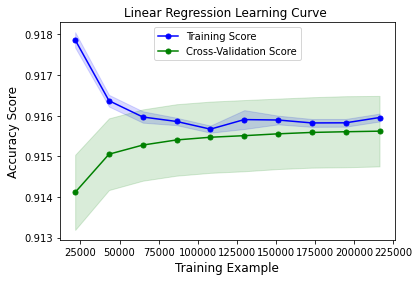

In [36]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lin_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)



# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Linear Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center')
plt.show()

**Decision Tree Regressor**

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [38]:
y_pred =tree_reg.predict(X_test_transformed)
y_pred

array([36700.,  7593.,  4792., ...,  3862.,  5102.,  6067.])

In [39]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [36700.  7593.  4792. 54608.  4337.]
Actual 1-5: [44652  7488  4792 54608  4298]


In [40]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean_Squared_Error(MSE):  10129738.723
Mean_Absolute_Error(MEA): 1083.511
R2_Score: 0.98
RMSE: 3182.725
Root_Mean_Squared_Log_Error(RMSLE): 8.065


In [41]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [42]:
Results_DecisionTree = pd.DataFrame([['Decision Tree', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_DecisionTree

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Decision Tree,1.012974e+07,1083.511,0.98,3182.725,8.065


**K-Nearest Neighbors**

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [45]:
y_pred =knn.predict(X_test_transformed)
y_pred

array([34746.8, 19490.6,  5846. , ...,  4552.4,  5181. ,  5808.8])

In [46]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [34746.8 19490.6  5846.  54608.   6291.8]
Actual 1-5: [44652  7488  4792 54608  4298]


In [47]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  135864017.995
Mean_Absolute_Error(MEA): 7265.793
R2_Score: 0.735
RMSE: 11656.072
Root_Mean_Squared_Log_Error(RMSLE): 9.364


In [48]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [49]:
Results_KNN = pd.DataFrame([['KNN', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_KNN

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,KNN,1.358640e+08,7265.793,0.735,11656.072,9.364


**SGDRegressor**

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
SGD = SGDRegressor()
SGD.fit(X_train_transformed, y_train)

SGDRegressor()

In [52]:
y_pred =SGD.predict(X_test_transformed)
y_pred

array([48309.21820317, 10366.69601473,  8362.69874028, ...,
        4685.45371063,  6654.24307465,  9791.91586932])

In [53]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [48309.21820317 10366.69601473  8362.69874028 52548.05876093
  5482.2384845 ]
Actual 1-5: [44652  7488  4792 54608  4298]


In [54]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  43691850.872
Mean_Absolute_Error(MEA): 4452.87
R2_Score: 0.915
RMSE: 6609.981
Root_Mean_Squared_Log_Error(RMSLE): 8.796


In [55]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [56]:
Results_SGD = pd.DataFrame([['SGD', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_SGD

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,SGD,4.369185e+07,4452.87,0.915,6609.981,8.796


**Ridge Regression**

In [57]:
from sklearn.linear_model import Ridge

In [58]:
Ridge=Ridge(alpha=0.01)
Ridge.fit(X_train_transformed, y_train)

Ridge(alpha=0.01)

In [59]:
y_pred =Ridge.predict(X_test_transformed)
y_pred

array([48299.6498368 , 10616.9494092 ,  8817.69855285, ...,
        5527.98004369,  6452.4363395 ,  9907.97057735])

In [60]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  43507279.408
Mean_Absolute_Error(MEA): 4427.03
R2_Score: 0.915
RMSE: 6596.005
Root_Mean_Squared_Log_Error(RMSLE): 8.794


In [61]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [62]:
Results_Ridge = pd.DataFrame([['Ridge', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_Ridge

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Ridge,4.350728e+07,4427.03,0.915,6596.005,8.794


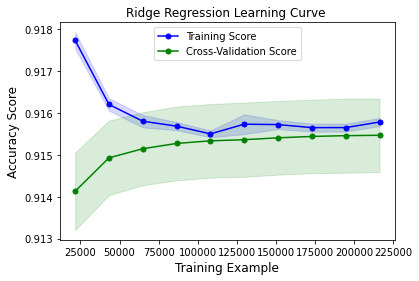

In [63]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Ridge, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)



# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Ridge Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center')
plt.show()

**Lasso Regression**


In [64]:
from sklearn.linear_model import Lasso

In [65]:
Lasso=Lasso()
Lasso.fit(X_train_transformed, y_train)

Lasso()

In [66]:
y_pred =Lasso.predict(X_test_transformed)
y_pred

array([48374.51748608, 10683.21916122,  8179.3751691 , ...,
        4368.2589903 ,  6181.48729497,  9067.35869302])

In [67]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  43718757.094
Mean_Absolute_Error(MEA): 4399.206
R2_Score: 0.915
RMSE: 6612.016
Root_Mean_Squared_Log_Error(RMSLE): 8.797


In [68]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [69]:
Results_Lasso = pd.DataFrame([['Lasso', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_Lasso

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Lasso,4.371876e+07,4399.206,0.915,6612.016,8.797


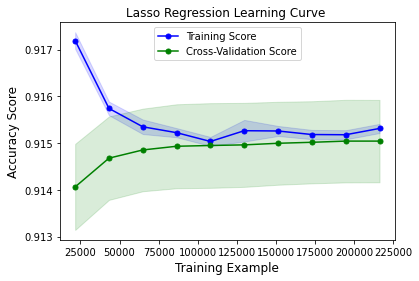

In [70]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Lasso, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)



# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Lasso Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center')
plt.show()

**Elastic Net Regression**

In [71]:
from sklearn.linear_model import ElasticNet

In [72]:
enr = ElasticNet()
enr.fit(X_train_transformed, y_train)

ElasticNet()

In [73]:
y_pred =enr.predict(X_test_transformed)
y_pred

array([29514.85708638, 17551.00712783, 17580.48295363, ...,
       14133.74731883, 16299.81772736, 17788.79563717])

In [74]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  270984519.078
Mean_Absolute_Error(MEA): 13881.755
R2_Score: 0.472
RMSE: 16461.607
Root_Mean_Squared_Log_Error(RMSLE): 9.709


In [75]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [76]:
Results_ElasticNet = pd.DataFrame([['ElasticNet', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_ElasticNet

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,ElasticNet,2.709845e+08,13881.755,0.472,16461.607,9.709


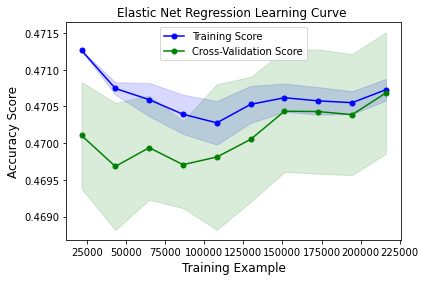

In [77]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=enr, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)



# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Elastic Net Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center')
plt.show()

**Linear SVM Regression**

In [78]:
from sklearn.svm import LinearSVR

In [79]:
svm_reg = LinearSVR(epsilon = 0.3)
svm_reg.fit(X_train_transformed, y_train)

LinearSVR(epsilon=0.3)

In [80]:
y_pred =svm_reg.predict(X_test_transformed)
y_pred

array([39440.835415  ,  8375.07087671,  7391.58335652, ...,
        1231.881662  ,  9527.35618714, 11031.19026083])

In [81]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  115863258.036
Mean_Absolute_Error(MEA): 6968.338
R2_Score: 0.774
RMSE: 10763.98
Root_Mean_Squared_Log_Error(RMSLE): 9.284


In [82]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [83]:
Results_svm_reg = pd.DataFrame([['SVM', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_svm_reg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,SVM,1.158633e+08,6968.338,0.774,10763.98,9.284


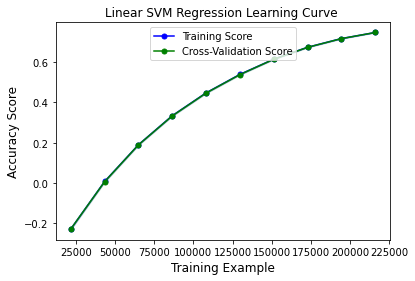

In [84]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)



# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Linear SVM Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center')
plt.show()

**Random Forest Regressor**

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rnd=RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd.fit(X_train_transformed, y_train)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=50, n_jobs=-1)

In [87]:
y_pred =rnd.predict(X_test_transformed)
y_pred

array([27853.99115366,  6154.56923109,  7855.32709713, ...,
        5964.16317412,  6154.56923109,  7855.32709713])

In [88]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  32364065.26
Mean_Absolute_Error(MEA): 3775.911
R2_Score: 0.937
RMSE: 5688.942
Root_Mean_Squared_Log_Error(RMSLE): 8.646


In [89]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [90]:
Results_RandomForestReg = pd.DataFrame([['Random Forest', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_RandomForestReg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Random Forest,32364065.26,3775.911,0.937,5688.942,8.646


**Extra Trees Regressor**

In [92]:
from sklearn.ensemble import ExtraTreesRegressor

In [93]:
extra_tree_reg=ExtraTreesRegressor(n_estimators=10, max_leaf_nodes=16, n_jobs=-1)
extra_tree_reg.fit(X_train_transformed, y_train)

ExtraTreesRegressor(max_leaf_nodes=16, n_estimators=10, n_jobs=-1)

In [94]:
y_pred =extra_tree_reg.predict(X_test_transformed)
y_pred

array([27849.51918911,  6848.83875184,  7394.76491917, ...,
        5219.87682969,  6235.77521354,  7394.76491917])

In [95]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  31937111.11
Mean_Absolute_Error(MEA): 3738.396
R2_Score: 0.938
RMSE: 5651.293
Root_Mean_Squared_Log_Error(RMSLE): 8.64


In [96]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [97]:
Results_ExtraTreesReg = pd.DataFrame([['Extra Trees', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_ExtraTreesReg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Extra Trees,31937111.11,3738.396,0.938,5651.293,8.64


**Gradient Boost Regression**

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [101]:
y_pred =gbr.predict(X_test_transformed)
y_pred

array([30430.29769187,  8433.025683  ,  7562.36331901, ...,
        5160.40663306,  6285.45917106,  7543.60544058])

In [102]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  28022821.993
Mean_Absolute_Error(MEA): 3293.33
R2_Score: 0.945
RMSE: 5293.659
Root_Mean_Squared_Log_Error(RMSLE): 8.574


In [103]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [104]:
Results_GradientBoostingReg = pd.DataFrame([['Gradient Boosting', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_GradientBoostingReg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Gradient Boosting,2.802282e+07,3293.33,0.945,5293.659,8.574


**XGBoost Regression**

In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [106]:
from xgboost.sklearn import XGBRegressor

In [107]:
xgbr = XGBRegressor()
xgbr.fit(X_train_transformed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [108]:
y_pred =xgbr.predict(X_test_transformed)
y_pred

array([32980.9   ,  9571.811 ,  6809.4287, ...,  3395.9727,  6232.7773,
        7175.193 ], dtype=float32)

In [109]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean_Squared_Error(MSE):  16498181.077
Mean_Absolute_Error(MEA): 2426.163
R2_Score: 0.968
RMSE: 4061.795
Root_Mean_Squared_Log_Error(RMSLE): 8.309


In [110]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [111]:
Results_XGradientBoostingReg = pd.DataFrame([['XGradient Boosting', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_XGradientBoostingReg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,XGradient Boosting,1.649818e+07,2426.163,0.968,4061.795,8.309


**AdaBoost Regressor**

In [112]:
from sklearn.ensemble import AdaBoostRegressor

In [113]:
AdaBoost_reg = AdaBoostRegressor()
AdaBoost_reg.fit(X_train_transformed, y_train)

AdaBoostRegressor()

In [114]:
y_pred =AdaBoost_reg.predict(X_test_transformed)
y_pred

array([29727.79027713,  7459.4272846 ,  7459.4272846 , ...,
        7459.4272846 ,  7459.4272846 ,  7459.4272846 ])

In [115]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  41297292.185
Mean_Absolute_Error(MEA): 4372.596
R2_Score: 0.92
RMSE: 6426.297
Root_Mean_Squared_Log_Error(RMSLE): 8.768


In [116]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [117]:
Results_AdaBoostReg = pd.DataFrame([['Ada Boosting', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_AdaBoostReg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Ada Boosting,4.129729e+07,4372.596,0.92,6426.297,8.768


**Voting**

In [118]:
 from sklearn.ensemble import VotingRegressor

In [119]:
#use ensemble Voting Regressor:

lin_reg = LinearRegression()
rnd = RandomForestRegressor(n_estimators=10, random_state=1)
knn = KNeighborsRegressor()

voting_reg = VotingRegressor([('lr', lin_reg), ('rf', rnd), ('r3', knn)])

In [120]:
voting_reg.fit(X_train_transformed, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('r3', KNeighborsRegressor())])

In [121]:
y_pred =voting_reg.predict(X_test_transformed)
y_pred

array([39931.83921709, 13275.60110991,  6438.02304582, ...,
        4708.92407733,  5560.01704479,  7226.53441135])

In [122]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

#R_squared = r2_score(y_test, y_pred)
#print(R_squared)

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  31334417.378
Mean_Absolute_Error(MEA): 3589.69
R2_Score: 0.939
RMSE: 5597.715
Root_Mean_Squared_Log_Error(RMSLE): 8.63


In [123]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [124]:
Results_voting_reg = pd.DataFrame([['voting', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_voting_reg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,voting,3.133442e+07,3589.69,0.939,5597.715,8.63


In [125]:
Result=pd.concat([Results_LinearRegression, Results_DecisionTree, Results_KNN, Results_SGD, Results_Ridge, Results_Lasso, Results_ElasticNet, Results_svm_reg, Results_RandomForestReg, Results_ExtraTreesReg, Results_GradientBoostingReg, Results_XGradientBoostingReg, Results_AdaBoostReg,Results_voting_reg])
Result.set_index('Model')
Result

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Linear_Reg,4.344349e+07,4419.435,0.915,6591.168,8.793
0,Decision Tree,1.012974e+07,1083.511,0.980,3182.725,8.065
0,KNN,1.358640e+08,7265.793,0.735,11656.072,9.364
0,SGD,4.369185e+07,4452.870,0.915,6609.981,8.796
0,Ridge,4.350728e+07,4427.030,0.915,6596.005,8.794
0,Lasso,4.371876e+07,4399.206,0.915,6612.016,8.797
0,ElasticNet,2.709845e+08,13881.755,0.472,16461.607,9.709
0,SVM,1.158633e+08,6968.338,0.774,10763.980,9.284
0,Random Forest,3.236407e+07,3775.911,0.937,5688.942,8.646
0,Extra Trees,3.193711e+07,3738.396,0.938,5651.293,8.640


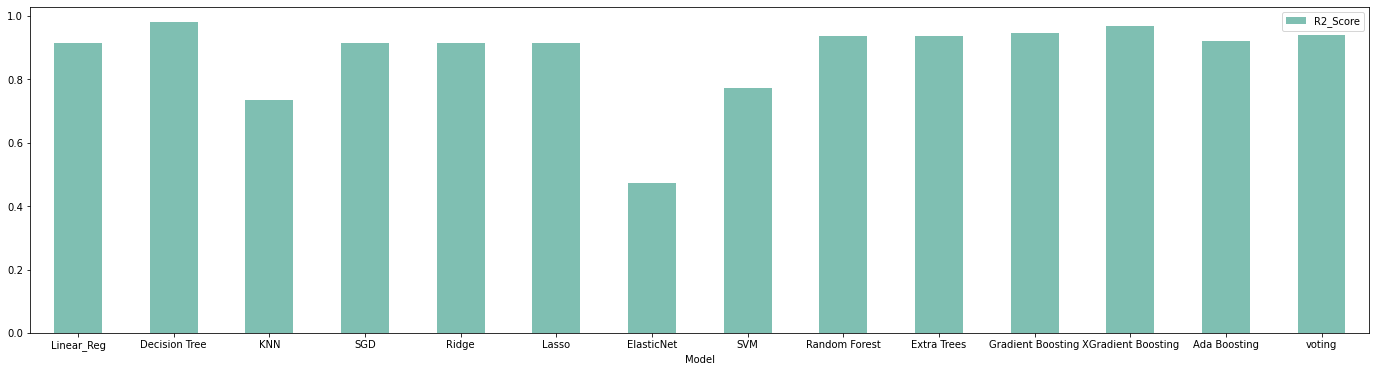

In [126]:
# Performance Bar Plot:

Result.plot(kind="bar", x = 'Model', y = ['R2_Score'],  rot=0, figsize=(24, 6), colormap='summer', alpha=0.5);
plt.show()

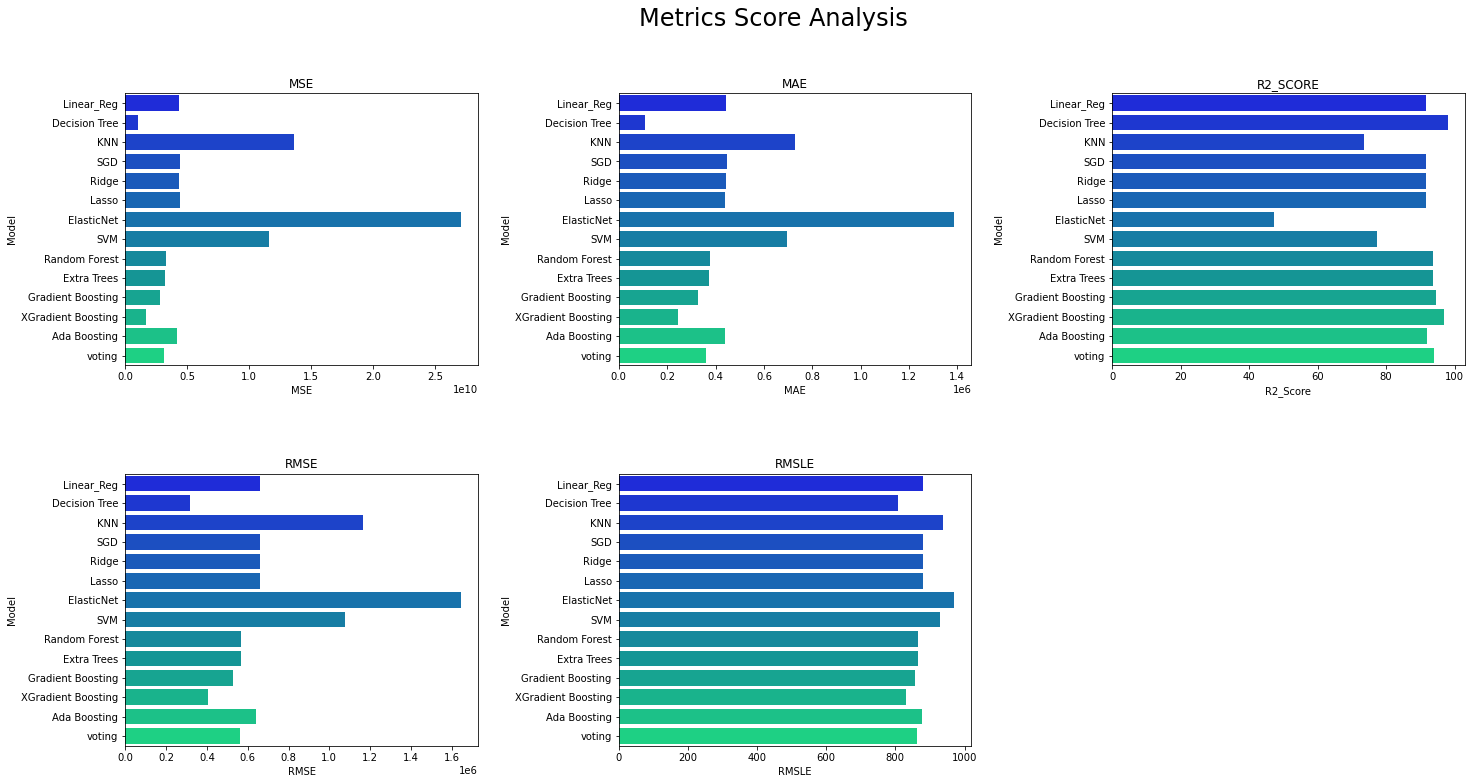

In [127]:
#plotting evaluation metrics in bar chart:

plt.figure(figsize=(24,12))
plt.suptitle("Metrics Score Analysis",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


tuple_list = [(1,'MSE'),(2,'MAE'),(3,'R2_Score'),(4,'RMSE'),(5,'RMSLE')]
for i, j in tuple_list:
    plt.subplot(2,3,i)
    plt.title(j.upper())
    sns.barplot(x = Result[j] * 100,
            y = 'Model',
            data = Result,
            palette = "winter",
            orient = 'h')

**Feature Analysis**